# **Spotify Music Nuance Classification (Multiclass)**

## Milestone 2 Phase 1
---
> **Arief Luqmannurhakim**

>> **Full Time Data-Science**

> **Batch 001**

Credit to Spotify Charts and [Kaggle](https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021)


# Download Datasets
---

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-19 07:30:16          10911  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6673  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2525  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2680  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d sashankpillai/spotify-top-200-charts-20202021 --unzip

  0% 0.00/165k [00:00<?, ?B/s]
100% 165k/165k [00:00<00:00, 63.2MB/s]


# Business Understanding
---
**All the songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021.**

> Create multi-class classification model to predict whether the song/track has happy , sad, or neutral nuance. 

> Recommendation with nuance or vibes of tracks

> Acknowledgements-
This dataset would not be possible without the help of spotifycharts.com and Spotipy Python Library

# Clean Dataset
---

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import ast
%matplotlib inline

In [ ]:
!pip install -U pandas-profiling

In [ ]:
df = pd.read_csv('spotify_dataset.csv')
df.head(3)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

---

**Handle the unknown missing value**

> I've already check genre value and surprisingly it contain missing value in form of 'space' or ' ' , truly unexpected since these kind of NaN were invisible and hard to detect. Here we'll handle it by checking the error using literal_eval function because Genre column is essentially a List. 

In [ ]:
df_clean = df.copy()
df_clean.set_index('Index', inplace=True)
df_clean.Genre = df_clean.Genre.apply(lambda x: x.replace('[]', '["other"]'))
for i in df_clean['Genre']:
  try:
    ast.literal_eval(i)
  except BaseException as err:
    print('err :{}r'.format(i))
    print(err)


err : r
unexpected EOF while parsing (<unknown>, line 1)
err : r
unexpected EOF while parsing (<unknown>, line 1)
err : r
unexpected EOF while parsing (<unknown>, line 1)
err : r
unexpected EOF while parsing (<unknown>, line 1)
err : r
unexpected EOF while parsing (<unknown>, line 1)
err : r
unexpected EOF while parsing (<unknown>, line 1)
err : r
unexpected EOF while parsing (<unknown>, line 1)
err : r
unexpected EOF while parsing (<unknown>, line 1)
err : r
unexpected EOF while parsing (<unknown>, line 1)
err : r
unexpected EOF while parsing (<unknown>, line 1)
err : r
unexpected EOF while parsing (<unknown>, line 1)


In [ ]:
idx_nan = df_clean.loc[df_clean['Genre'] == ' ', 'Genre'].index
df_clean.drop(idx_nan, inplace=True)

In [ ]:
for i in df_clean['Genre']:
  try:
    ast.literal_eval(i)
  except BaseException as err:
    print('err :{}r'.format(i))
    print(err)

In [ ]:
df_clean['Genre'] = df_clean['Genre'].apply(ast.literal_eval)
df_clean.head(3)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"[indie rock italiano, italian pop]",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,[australian hip hop],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,[pop],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A


**We need to address the issues for column type. Based on table head above these are the column we need to change its type from object to numeric or float**:
1. Artist Followers
2. Streams 
3. Popularity	
4. Danceability	
5. Energy	
6. Loudness	
7. Speechiness	
8. Acousticness	
9. Liveness	
10. Tempo	
11. Duration (ms)	
12. Valence

---



In [ ]:
col = ['Artist Followers',
       'Streams',
       'Popularity',
       'Danceability',
       'Energy',
       'Loudness',
       'Speechiness',
       'Acousticness',
       'Liveness',
       'Tempo',
       'Duration (ms)',
       'Valence']

for i in col :
  if i == 'Streams' or i == 'Artist Followers':
    df_clean[i] = df_clean[i].apply(lambda x: x.replace(',', ''))
    df_clean[i] = df_clean[i].astype('int32')
  
  else: 
    df_clean[i] = df_clean[i].astype('float32')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Week of Highest Charting   1545 non-null   object 
 3   Song Name                  1545 non-null   object 
 4   Streams                    1545 non-null   int32  
 5   Artist                     1545 non-null   object 
 6   Artist Followers           1545 non-null   int32  
 7   Song ID                    1545 non-null   object 
 8   Genre                      1545 non-null   object 
 9   Release Date               1545 non-null   object 
 10  Weeks Charted              1545 non-null   object 
 11  Popularity                 1545 non-null   float32
 12  Danceability               1545 non-null   float32
 13  Energy                     1545 non-null   float

# Data Exploration
---


Var | Desc
--- | ---
Highest Charting Position | The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
Number of Times Charted | The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
Week of Highest Charting | The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
Song Name | Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
Song iD | The song ID provided by Spotify (unique to each song).
Streams | Approximate number of streams the song has.
Artist | The main artist/ artists involved in making the song.
Artist Followers | The number of followers the main artist has on Spotify.
Genre | The genres the song belongs to.
Release Date | The initial date that the song was released.
Weeks Charted | The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
Popularity |The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
Danceability | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
Acousticness | A measure from 0.0 to 1.0 of whether the track is acoustic.
Energy | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
Instrumentalness | Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
Liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
Loudness | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
Speechiness | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
Tempo | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
Valence | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
Chord | The main chord of the song instrumental.

---

In [ ]:
df_clean.head(3)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"[indie rock italiano, italian pop]",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.001999,211560.0,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,[australian hip hop],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.927994,141806.0,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,[pop],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.927994,178147.0,0.688,A


# Top 10 Genre
---

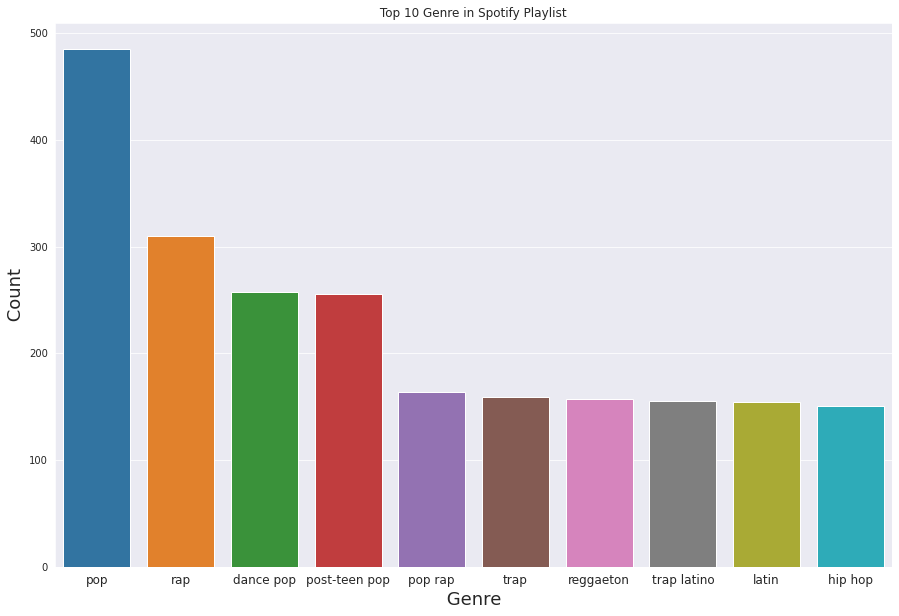

In [ ]:
def extract_list(df: pd.Series):
  list_genre = [x for i in df_clean.Genre for x in i]
  return pd.Series(list_genre)



with sns.axes_style('darkgrid'):
  fig, ax = plt.subplots(figsize=(15,10))

  sns.barplot(x = extract_list(df_clean.Genre).value_counts().nlargest(10).index,
              y = extract_list(df_clean.Genre).value_counts().nlargest(10).values)
  plt.title(" Top 10 Genre in Spotify Playlist ")
  plt.ylabel(" Count ", fontsize=18)
  plt.xlabel(" Genre ", fontsize=18)
  plt.xticks(fontsize=12)
  plt.show()


**Pop is the most popular genre in Spotify followed by rap**

---

[Check Var/Columns Details](#scrollTo=pSuKZVgi-E0Q&line=5&uniqifier=1)

Overview all dataset with padnas profiling for quick analysis

In [ ]:
pandas_profiling.ProfileReport(df_clean)

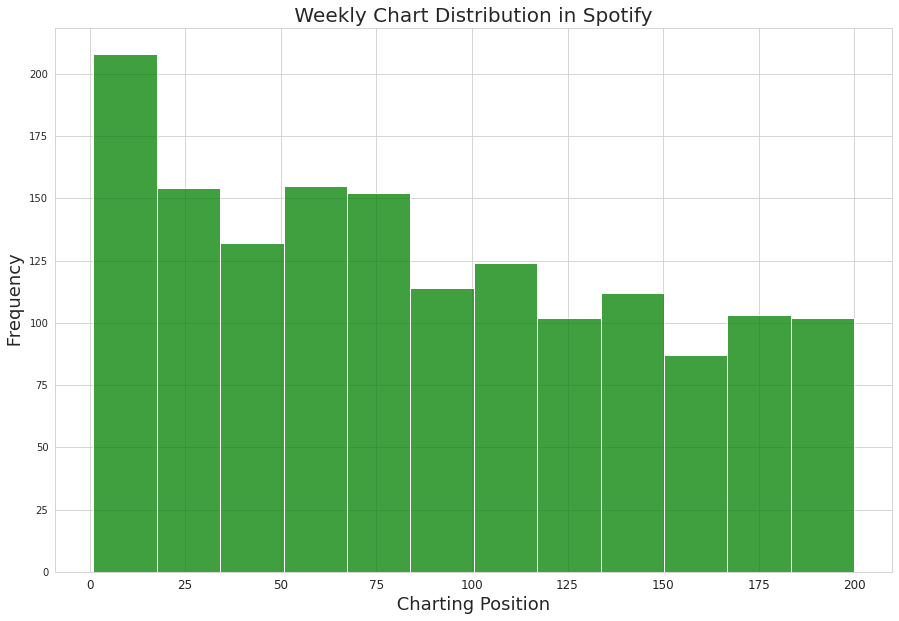

In [ ]:

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(15,10))

  sns.histplot(df_clean['Highest Charting Position'], color='g')
  plt.title(" Weekly Chart Distribution in Spotify ", fontsize=20)
  plt.ylabel(" Frequency ", fontsize=18)
  plt.xlabel(" Charting Position ", fontsize=18)
  plt.xticks(fontsize=12)
  plt.show()


**This dataset domninated with song that get 1st - 20th chart position in Spotify weekly chart**

---

# Popular Song
---

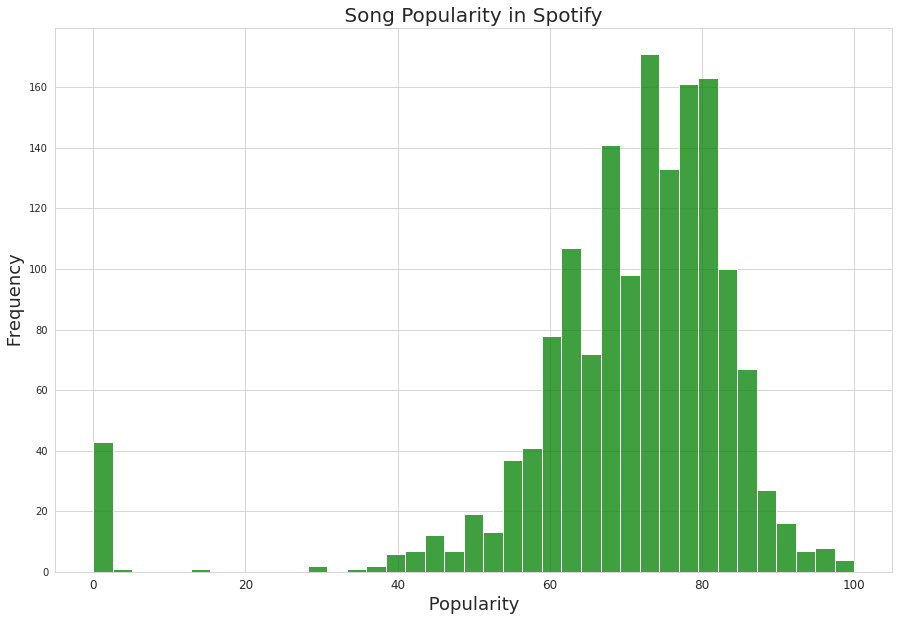

In [ ]:
with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(15,10))

  sns.histplot(df_clean['Popularity'], color='g')
  plt.title(" Song Popularity in Spotify ", fontsize=20)
  plt.ylabel(" Frequency ", fontsize=18)
  plt.xlabel(" Popularity ", fontsize=18)
  plt.xticks(fontsize=12)
  plt.show()

**Most of the song are quiet popular with few that seems not so popular and several songs reach 100 point of popularity in Spotify. Lets find out which song is so popular**

---

In [ ]:
pop = df_clean[['Popularity', 'Song Name', 'Artist', 'Artist Followers']].nlargest(10, 'Popularity')
pop

,Popularity,Song Name,Artist,Artist Followers
Index,,,,
1,100.0,Beggin',Måneskin,3377762
2,99.0,STAY (with Justin Bieber),The Kid LAROI,2230022
3,99.0,good 4 u,Olivia Rodrigo,6266514
4,98.0,Bad Habits,Ed Sheeran,83293380
6,97.0,MONTERO (Call Me By Your Name),Lil Nas X,5473565
5,96.0,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565
9,96.0,Yonaguni,Bad Bunny,36142273
8,95.0,Todo De Ti,Rauw Alejandro,6080597
10,95.0,I WANNA BE YOUR SLAVE,Måneskin,3377762


**Very surprising , even though Beggin by Maneskin reach 100 point of popularity , their followers not even reach most known artis like Ed Sheeran. You can see the chart below, it seems sum of followers doesn't always reach prefect popularity point. But of course it still popular anyway**

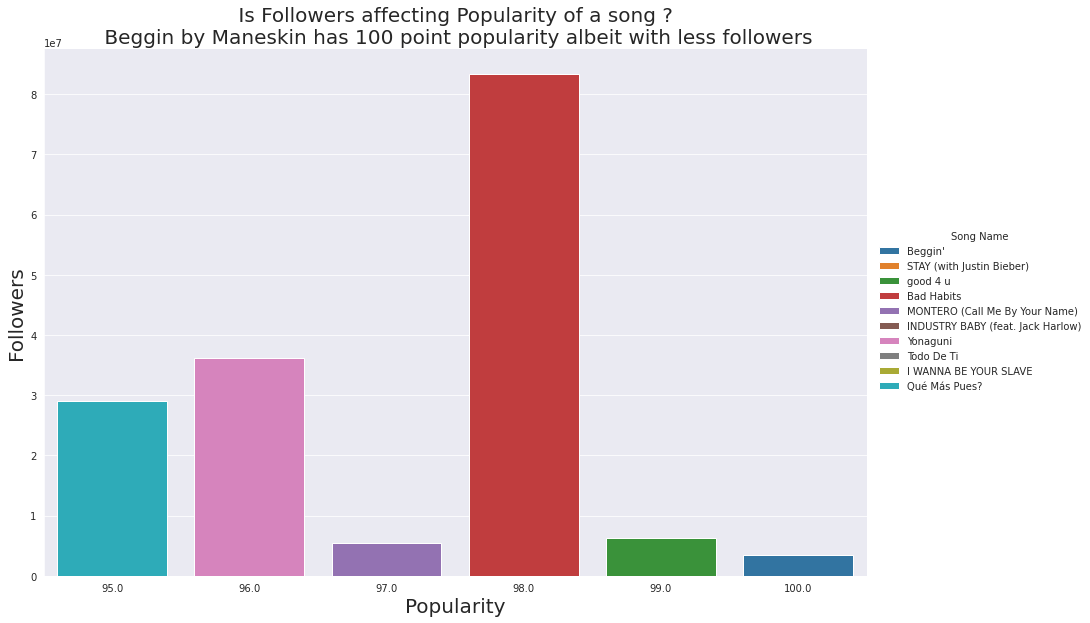

In [ ]:
with sns.axes_style('darkgrid'):

  sns.catplot(data = pop,
              x = 'Popularity',
              y = 'Artist Followers',
              aspect= 1.5,
              height=8,
              hue='Song Name',
              kind='bar',
              dodge= False)
  plt.title(" Is Followers affecting Popularity of a song ? \n Beggin by Maneskin has 100 point popularity albeit with less followers", fontsize=20)
  plt.xlabel('Popularity', fontsize=20)
  plt.ylabel('Followers', fontsize=20)

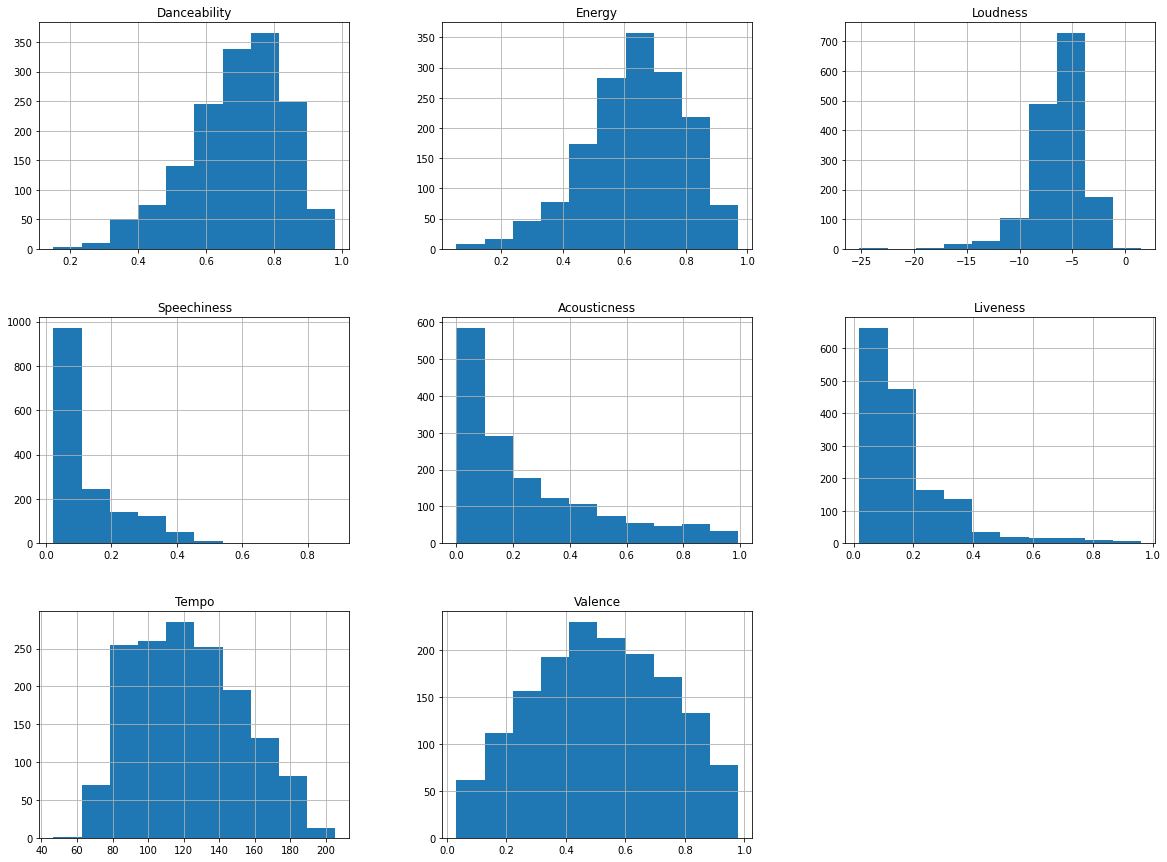

In [ ]:
df_clean[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']].hist(figsize=(20, 15))
plt.show()

# Modeling and Pre-Processing
---

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, precision_score, f1_score, accuracy_score, recall_score

In [ ]:
df_clean.head(1)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"[indie rock italiano, italian pop]",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,0.714,0.8,-4.808,0.0504,0.127,0.359,134.001999,211560.0,0.589,B


We want to claasify the nuance or vibe of a music , in order to do that we need to create new column based on Valence and set certain threshold for classfication

> Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

> 



In [ ]:
dataset = df_clean.copy()
dataset = dataset[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Chord', 'Valence']]
dataset

,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Chord,Valence
Index,,,,,,,,,
1,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.001999,B,0.589
2,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.927994,C#/Db,0.478
3,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.927994,A,0.688
4,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026001,B,0.591
5,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.994995,D#/Eb,0.894
...,...,...,...,...,...,...,...,...,...
1552,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.072998,A,0.608
1553,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.369995,B,0.714
1554,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.987999,D,0.394


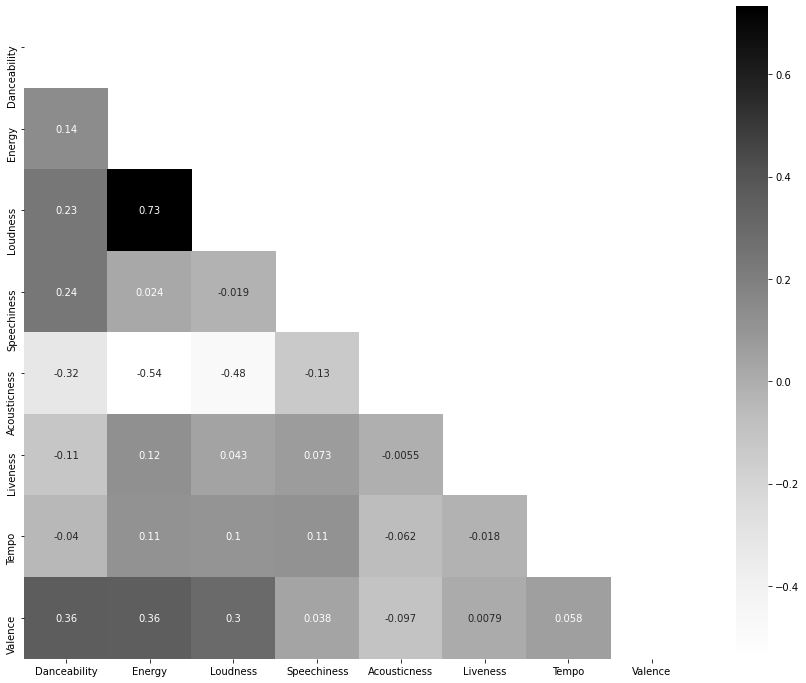

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset.corr(), cmap='Greys', annot=True, mask=mask)
plt.show()

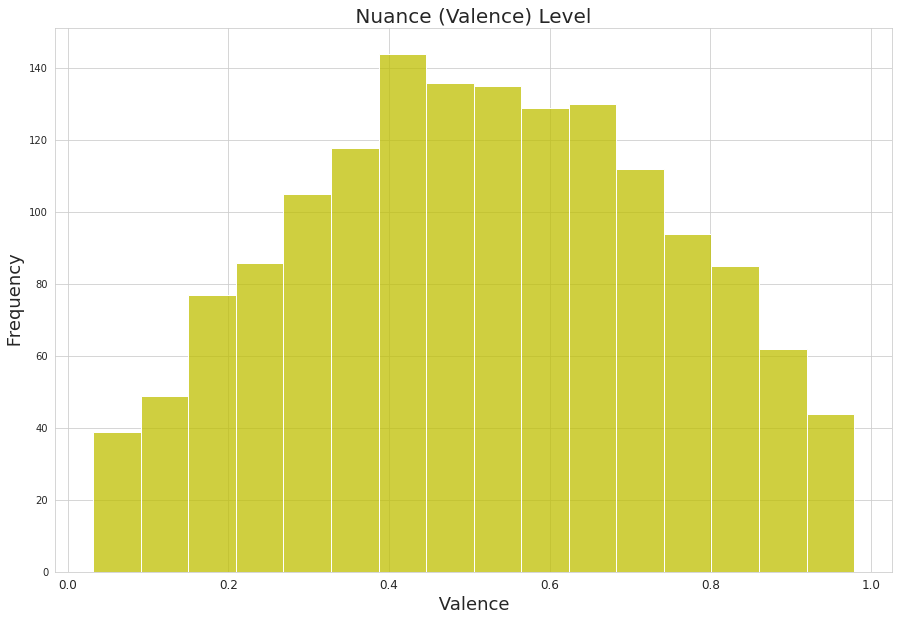

In [ ]:
with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(15,10))

  sns.histplot(df_clean['Valence'], color='y')
  plt.title(" Nuance (Valence) Level ", fontsize=20)
  plt.ylabel(" Frequency ", fontsize=18)
  plt.xlabel(" Valence ", fontsize=18)
  plt.xticks(fontsize=12)
  plt.show()

we're going to divide it into 3 class

> 0 - 0.3 --> sad
>
> 0.3 - 0.7 --> neutral(combined emotion)
>
> more than 0.7 -- > Happy/euphoric

In [ ]:
dataset.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Chord,Valence
Index,,,,,,,,,
1,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.001999,B,0.589
2,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.927994,C#/Db,0.478
3,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.927994,A,0.688
4,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026001,B,0.591
5,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.994995,D#/Eb,0.894


In [ ]:
dataset.Chord.unique()

array(['B', 'C#/Db', 'A', 'D#/Eb', 'G#/Ab', 'F#/Gb', 'C', 'D', 'A#/Bb',
       'G', 'E', 'F'], dtype=object)

In [ ]:
dataset['Valence'] = dataset['Valence'].apply(lambda x: 'sad' if x <= 0.333 else 'happy' if x > 0.666 else 'neutral')
dataset

,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Chord,Valence
Index,,,,,,,,,
1,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.001999,B,neutral
2,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.927994,C#/Db,neutral
3,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.927994,A,happy
4,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026001,B,neutral
5,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.994995,D#/Eb,happy
...,...,...,...,...,...,...,...,...,...
1552,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.072998,A,neutral
1553,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.369995,B,happy
1554,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.987999,D,neutral


In [ ]:
dataset.Valence.unique()

array(['neutral', 'happy', 'sad'], dtype=object)

In [ ]:
train = dataset.copy()
X_train, X_test = train_test_split(train, test_size = 0.2, random_state = 42)

encode = LabelEncoder()

X_train['Chord'] = encode.fit_transform(X_train.loc[:, ['Chord']])
X_test['Chord'] = encode.transform(X_test.loc[: , ['Chord']])




In [ ]:
X_train.head()

,Danceability,Energy,Speechiness,Acousticness,Liveness,Valence
Index,,,,,,
485,0.691,0.739,0.2290,0.42200,0.1100,happy
534,0.333,0.637,0.0581,0.13100,0.1490,sad
1199,0.812,0.506,0.1160,0.28100,0.3250,neutral
868,0.616,0.617,0.5200,0.12800,0.1770,neutral
1151,0.679,0.731,0.0319,0.00518,0.0614,happy


In [ ]:

y_train = X_train.pop('Valence')
y_test = X_test.pop('Valence')

y_train = encode.fit_transform(y_train)
y_test = encode.transform(y_test)

In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train

array([0, 2, 1, ..., 1, 2, 2])

In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 589, 0: 347, 2: 300})
Counter({1: 150, 0: 93, 2: 66})


# Random Forest
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(39)
randomForest_model = RandomForestClassifier(random_state=0)

scorers = {
    'precision_score': make_scorer(precision_score, average='micro'),
    'recall_score': make_scorer(recall_score, average='micro'),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='macro')
}

parameters = {'criterion':['gini'], 'min_samples_split': [2, 8], 'max_depth': [5, 10]}

grid_forest = GridSearchCV(randomForest_model, parameters, scoring=scorers, refit='f1_score')
%timeit grid_forest.fit(X_train, y_train)

1 loop, best of 5: 5.08 s per loop


In [ ]:
print(grid_forest.best_params_)
print(grid_forest.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 8}
0.5061623662663549


In [ ]:
y_pred = grid_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.49        93
           1       0.56      0.81      0.67       150
           2       0.65      0.39      0.49        66

    accuracy                           0.60       309
   macro avg       0.63      0.53      0.55       309
weighted avg       0.62      0.60      0.58       309



> Cross Validation : Stratified Kfold, becase of imbalance dataset

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross = cross_validate(grid_forest.best_estimator_, X_train, y_train, cv=cv, scoring=scorers)

print('Mean of %s --> %f' %('test_accuracy_score' ,np.mean(cross['test_accuracy_score'])))
print('Mean of %s --> %f' %('test_precision_score' ,np.mean(cross['test_precision_score'])))
print('Mean of %s --> %f' %('test_recall_score' ,np.mean(cross['test_recall_score'])))
print('Mean of %s --> %f' %('test_f1_score' ,np.mean(cross['test_f1_score'])))

Mean of test_accuracy_score --> 0.555795
Mean of test_precision_score --> 0.555795
Mean of test_recall_score --> 0.555795
Mean of test_f1_score --> 0.507981


---

# Logistic Regression
---

In [ ]:
from sklearn.linear_model import LogisticRegression

logReg_model = LogisticRegression(random_state=42, max_iter=500, solver='liblinear')


parameters = {'penalty':['l1', 'l2'], 'C': [1, 10]}

grid_log = GridSearchCV(logReg_model, parameters, scoring=scorers, refit='f1_score')
%timeit grid_log.fit(X_train, y_train)

1 loop, best of 5: 721 ms per loop


> Training Score

In [ ]:
print(grid_log.best_params_)
print(grid_log.best_score_)

{'C': 10, 'penalty': 'l1'}
0.4794337704025164


> Testing Score

In [ ]:
y_pred = grid_log.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.26      0.36        93
           1       0.53      0.79      0.64       150
           2       0.57      0.39      0.46        66

    accuracy                           0.55       309
   macro avg       0.57      0.48      0.49       309
weighted avg       0.56      0.55      0.52       309



> Cross Validation : Stratified Kfold, becase of imbalance dataset

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross = cross_validate(grid_log.best_estimator_, X_train, y_train, cv=cv, scoring=scorers)

print('Mean of %s --> %f' %('test_accuracy_score' ,np.mean(cross['test_accuracy_score'])))
print('Mean of %s --> %f' %('test_precision_score' ,np.mean(cross['test_precision_score'])))
print('Mean of %s --> %f' %('test_recall_score' ,np.mean(cross['test_recall_score'])))
print('Mean of %s --> %f' %('test_f1_score' ,np.mean(cross['test_f1_score'])))

Mean of test_accuracy_score --> 0.534785
Mean of test_precision_score --> 0.534785
Mean of test_recall_score --> 0.534785
Mean of test_f1_score --> 0.476902


---

# Pipeline & Improvement
---
> Remove some feature with no effect like chord and Tempo, nuance does not decided by how long the tracks are and what kind of initial Chord the tracks are playing.

In [ ]:
dataset = df_clean.copy()
dataset = dataset[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence']]
dataset

,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence
Index,,,,,,,
1,0.714,0.800,-4.808,0.0504,0.12700,0.3590,0.589
2,0.591,0.764,-5.484,0.0483,0.03830,0.1030,0.478
3,0.563,0.664,-5.044,0.1540,0.33500,0.0849,0.688
4,0.808,0.897,-3.712,0.0348,0.04690,0.3640,0.591
5,0.736,0.704,-7.409,0.0615,0.02030,0.0501,0.894
...,...,...,...,...,...,...,...
1552,0.762,0.700,-6.021,0.0694,0.00261,0.1530,0.608
1553,0.528,0.870,-3.123,0.0851,0.24000,0.3330,0.714
1554,0.765,0.523,-4.333,0.0300,0.18400,0.1320,0.394


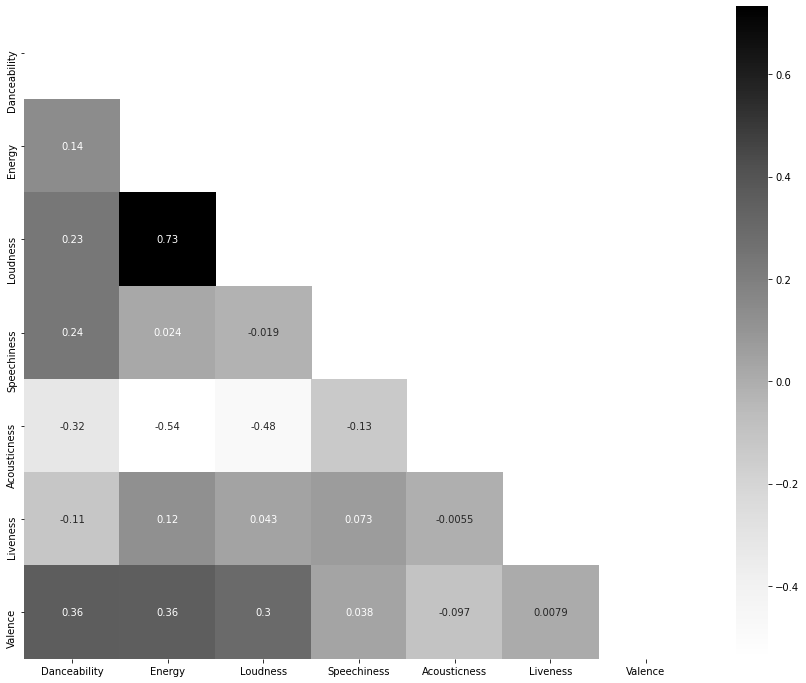

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset.corr(), cmap='Greys', annot=True, mask=mask)
plt.show()

In [ ]:
dataset['Valence'] = dataset['Valence'].apply(lambda x: 'sad' if x <= 0.333 else 'happy' if x > 0.666 else 'neutral')
dataset

,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence
Index,,,,,,,
1,0.714,0.800,-4.808,0.0504,0.12700,0.3590,neutral
2,0.591,0.764,-5.484,0.0483,0.03830,0.1030,neutral
3,0.563,0.664,-5.044,0.1540,0.33500,0.0849,happy
4,0.808,0.897,-3.712,0.0348,0.04690,0.3640,neutral
5,0.736,0.704,-7.409,0.0615,0.02030,0.0501,happy
...,...,...,...,...,...,...,...
1552,0.762,0.700,-6.021,0.0694,0.00261,0.1530,neutral
1553,0.528,0.870,-3.123,0.0851,0.24000,0.3330,happy
1554,0.765,0.523,-4.333,0.0300,0.18400,0.1320,neutral


In [ ]:
train = dataset.copy()
X_train, X_test = train_test_split(train, test_size = 0.2, random_state = 42)

encode = LabelEncoder()



y_train = X_train.pop('Valence')
y_test = X_test.pop('Valence')

y_train = encode.fit_transform(y_train)
y_test = encode.transform(y_test)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.linear_model import Ridge
np.random.seed(0)

parameters = {'criterion':['gini'], 'min_samples_split': [2, 8], 'max_depth': [5, 10]}
parameters = {'penalty':['l1', 'l2'], 'C': [1, 10]}

param_grid = [
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'classifier__criterion': ['gini'],
     'classifier__min_samples_split': [8],
     'classifier__max_depth': [10, 20]},
    {'classifier': [LogisticRegression(solver='liblinear')],
     'classifier__penalty':['l1', 'l2'],
     'classifier__C': [1, 10, 100] } ]

pipe = pipe = Pipeline([('classifier', LogisticRegression())])

grid = GridSearchCV(pipe, param_grid, cv=cv)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                  

In [ ]:
print("score: {:.2f}\n".format(grid.score(X_test, y_test)))
print("Parameter:\n\n{}\n".format(grid.best_params_))
print("cross-validation score: {:.2f}".format(grid.best_score_))

score: 0.56

Parameter:

{'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__min_samples_split': 8}

cross-validation score: 0.56


In [ ]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.40      0.49        93
           1       0.55      0.72      0.62       150
           2       0.50      0.41      0.45        66

    accuracy                           0.56       309
   macro avg       0.56      0.51      0.52       309
weighted avg       0.56      0.56      0.55       309



In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross = cross_validate(grid.best_estimator_, X_train, y_train, cv=cv, scoring=scorers)

print('Mean of %s --> %f' %('test_accuracy_score' ,np.mean(cross['test_accuracy_score'])))
print('Mean of %s --> %f' %('test_precision_score' ,np.mean(cross['test_precision_score'])))
print('Mean of %s --> %f' %('test_recall_score' ,np.mean(cross['test_recall_score'])))
print('Mean of %s --> %f' %('test_f1_score' ,np.mean(cross['test_f1_score'])))

Mean of test_accuracy_score --> 0.545279
Mean of test_precision_score --> 0.545279
Mean of test_recall_score --> 0.545279
Mean of test_f1_score --> 0.511557


# Conclusion
---

In this notebook we already see some data exploration about Spotify dataset, here I use valence(vibe or nuance) as target because classify genre would be too common as music has so many variability and each song can belong to multiple genre, hence predicting nuance or vibe of a song might be interesting and may lead to new recommendation system for creating a set of playlist with similar nuance.

---
> Best Model for Spotify Nuance Multi-Classification Problem:
>> Random Forest

```
 precision    recall  f1-score   support

           0       0.68      0.39      0.49        93
           1       0.56      0.81      0.67       150
           2       0.65      0.39      0.49        66

    accuracy                           0.60       309
   macro avg       0.63      0.53      0.55       309
weighted avg       0.62      0.60      0.58       309
```

**Difficulty**

----
> It seems doing a multiclass problem truly increasing the difficulty for classification problem, I believe this is caused by Valence's value range that has only 0 - 1.0,
>
> More bigger range needed to maintain distance between nuance of a song, since small range might to narrow.

**Possible Solutions**

---

1.   Gather more data
2.   Change into binary classification

